# Grouped Bar Chart

This example notebook generates grouped bar charts customized for climate model performance comparison between different generations, using Python numpy and matplotlib.

Jiwoo Lee (LLNL), 2024-08-23

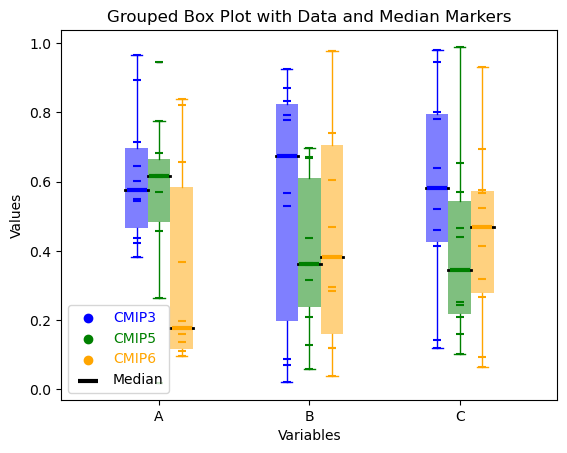

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data setup
groups = ['CMIP3', 'CMIP5', 'CMIP6']
variables = ['A', 'B', 'C']

# Random data for illustration
np.random.seed(0)
data = {
    'CMIP3': [np.random.rand(10) for _ in variables],
    'CMIP5': [np.random.rand(10) for _ in variables],
    'CMIP6': [np.random.rand(10) for _ in variables],
}

# Box plot setup
x = np.arange(len(variables))  # the label locations
width = 0.15  # Narrower width for the box plots

fig, ax = plt.subplots()

# Define colors for each group
colors = ['blue', 'green', 'orange']

# Store handles for the legend
handles = []

# Plot box plots for each group
for i, (group, color) in enumerate(zip(groups, colors)):
    positions = x + i*width  # Shift each group horizontally
    bp = ax.boxplot(data[group], positions=positions, widths=width, patch_artist=True,
                    boxprops=dict(facecolor=color, edgecolor=color, alpha=0.5, linewidth=0),
                    medianprops=dict(color='black', linewidth=2),
                    whiskerprops=dict(color=color),
                    capprops=dict(color=color),
                    flierprops=dict(marker='_', color=color, markersize=5))
    
    # Add markers for individual data points
    for j in range(len(variables)):
        y = data[group][j]
        ax.scatter(np.full_like(y, positions[j]), y, marker='_', color=color, zorder=5)
        
        # Highlight the median with a thicker and longer dash marker
        median_value = np.median(y)
        ax.scatter(positions[j], median_value, marker='_', color=color, s=200, linewidth=3, zorder=7)
    
    # Create a dummy plot for the group to add to the legend
    handles.append(ax.scatter([], [], color=color, label=group))

# Add a legend entry for the median marker
handles.append(ax.scatter([], [], marker='_', color='black', s=200, linewidth=3, label='Median'))

# Customize legend with colored text
legend = ax.legend(handles=handles)
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Grouped Box Plot with Data and Median Markers')
ax.set_xticks(x + width)
ax.set_xticklabels(variables)

# Show plot
plt.show()